In [25]:
import os
os.getcwd()

'/Users/patlolapreethi/Documents/Trent/Sem 4/Project Implementation 1'

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import psutil
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# -----------------------------------
# ✅ 1. Setting Up Environment
# -----------------------------------
print("✅ Checking system specifications...")

# Print RAM & CPU usage
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Available RAM: {round(psutil.virtual_memory().available / (1024**3), 2)} GB")
print(f"CPU Usage: {psutil.cpu_percent()}%")

# Install required Python libraries (run in terminal if not installed)
# pip install pandas numpy matplotlib seaborn scikit-learn

# -----------------------------------
# ✅ 2. Loading Dataset
# -----------------------------------
print("\n✅ Loading dataset...")
df = pd.read_csv("PAC_AEbyVote.csv")  # Replace with actual filename
print("Dataset loaded successfully! Shape:", df.shape)

# Display first few rows
print("\n🔍 First few rows of the dataset:")
print(df.head())

✅ Checking system specifications...
Total RAM: 8.0 GB
Available RAM: 2.02 GB
CPU Usage: 16.2%

✅ Loading dataset...
Dataset loaded successfully! Shape: (7692, 7)

🔍 First few rows of the dataset:
        fy_ef  org_id                                 org_name  \
0  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
1  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
2  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
3  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
4  FY 2011-12     1.0  Department of Agriculture and Agri-Food   

  voted_or_statutory                                   description  \
0                  1                             Operating/Program   
1                 10                        Grants & Contributions   
2                  5                                       Capital   
3                  S  Canadian Cattlemen's Association Legacy Fund   
4                  S    Canadian Pari-Mutuel Agency Revol

In [2]:
# -----------------------------------
# ✅ 3. Initial Data Quality Check
# -----------------------------------
print("\n✅ Checking for missing values...")
print(df.isnull().sum())  # Check for missing data

print("\n✅ Checking for duplicate records...")
print(f"Duplicate rows found: {df.duplicated().sum()}")
# If duplicated found -> df.drop_duplicates()


✅ Checking for missing values...
fy_ef                   0
org_id                  1
org_name                0
voted_or_statutory      0
description             0
authorities            35
expenditures          228
dtype: int64

✅ Checking for duplicate records...
Duplicate rows found: 0


In [3]:
# -----------------------------------
# ✅ 4. Handling Missing Values
# -----------------------------------
# Replacing missing values with median not mean
raw_df= df
df = df[(df['authorities'] >= 0) & (df['expenditures'] >= 0)]
print("\n✅ Handling missing values...")
df.fillna({"authorities": df["authorities"].mean(), 
           "expenditures": df["expenditures"].mean()}, inplace=True)

df.fillna("Unknown", inplace=True)  # Fill missing categorical values
print("Missing values handled successfully.")


✅ Handling missing values...
Missing values handled successfully.


/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3307652455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"authorities": df["authorities"].mean(),
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3307652455.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)  # Fill missing categorical values
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3307652455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [4]:
# -----------------------------------
# ✅ 5. Standardizing Column Names & Formatting
# -----------------------------------

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Standardize column names
#df["fy_ef"] = pd.to_datetime(df["fy_ef"], errors="coerce")  # Convert fiscal year to datetime if applicable

In [5]:
len(df)

7211

In [6]:
# -----------------------------------
# ✅ 6. Exploratory Data Analysis (EDA)
# -----------------------------------
# Set the float format to show numbers in regular notation (without scientific notation)
pd.set_option('display.float_format', '{:.5f}'.format)
print("\n✅ Performing Exploratory Data Analysis...")

# Summary statistics
print("\n🔍 Summary Statistics:")
print(df.describe())


✅ Performing Exploratory Data Analysis...

🔍 Summary Statistics:
            authorities      expenditures
count        7211.00000        7211.00000
mean    592590711.55930   554578213.79444
std    3086645102.18338  3033745891.15736
min             0.00000           0.00000
25%        486207.00000      231280.49000
50%      12286516.00000     9546694.00000
75%     128205871.00000   105759721.00000
max   57444856822.00000 57444856822.00000


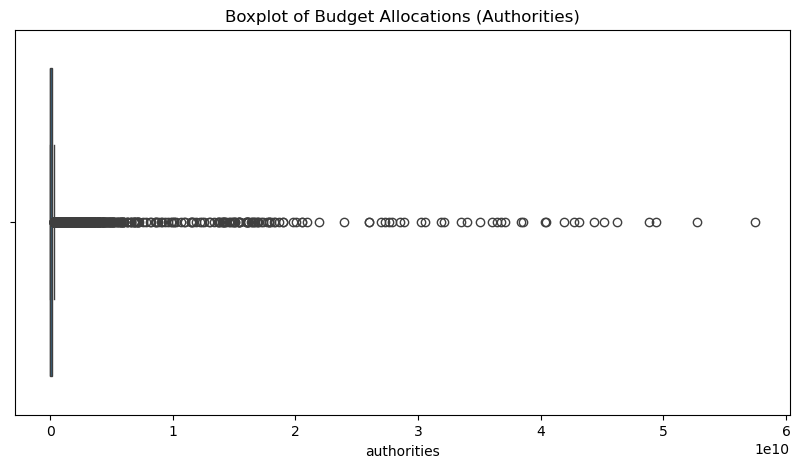

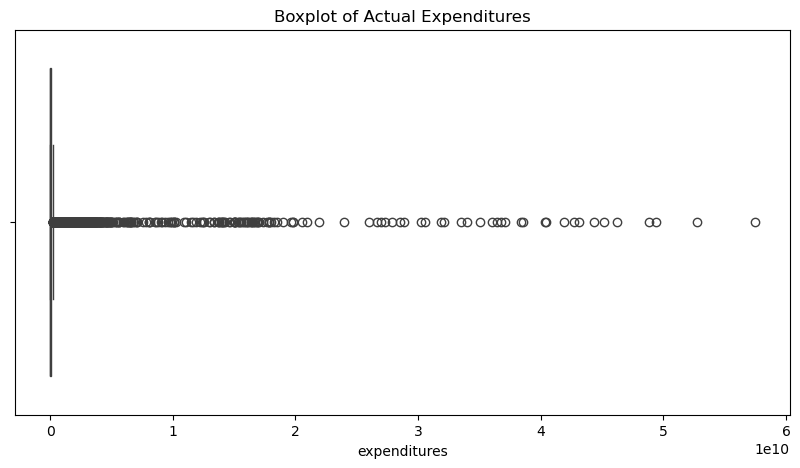

In [7]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['authorities'])
plt.title("Boxplot of Budget Allocations (Authorities)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['expenditures'])
plt.title("Boxplot of Actual Expenditures")
plt.show()


Extreme Skewness & Outliers:

The data appears to be highly skewed, with a large number of outliers extending far to the right.
Most data points are concentrated near the lower end, but a few extremely high values (outliers) extend far beyond the main distribution.
Compressed Box (IQR is Small):

The main box (interquartile range, IQR) is extremely small, suggesting that the majority of the budget allocations are relatively low.
However, there are many high-value outliers.
Long Right Tail:

The presence of so many outliers and the long right tail indicates a few authorities receive significantly larger budgets compared to the rest.
Possible Interpretation:
A small number of authorities are allocated significantly higher budgets than the majority.
The budget data has a highly skewed distribution, where most values are clustered near the lower end.
If this is public budget allocation data, it suggests a large disparity in how funds are distributed.


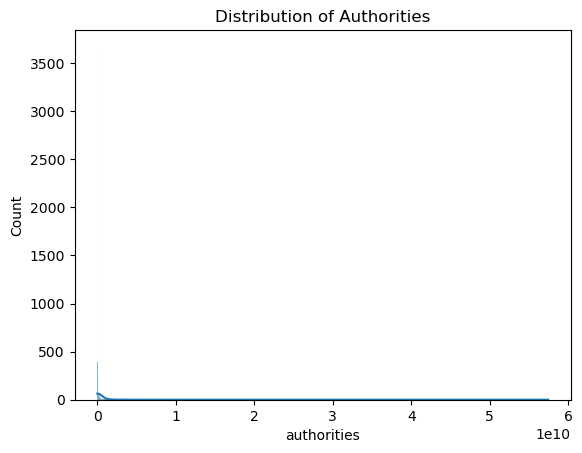

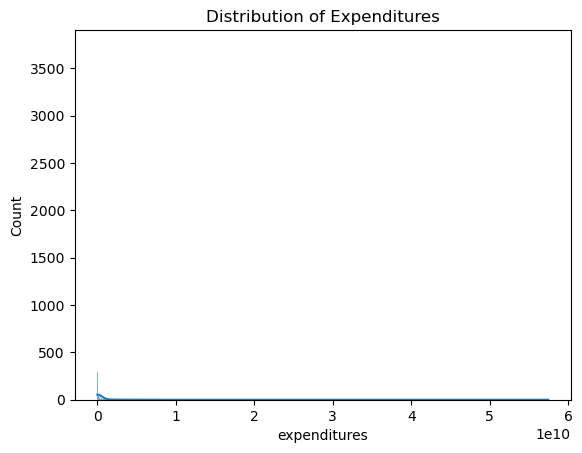

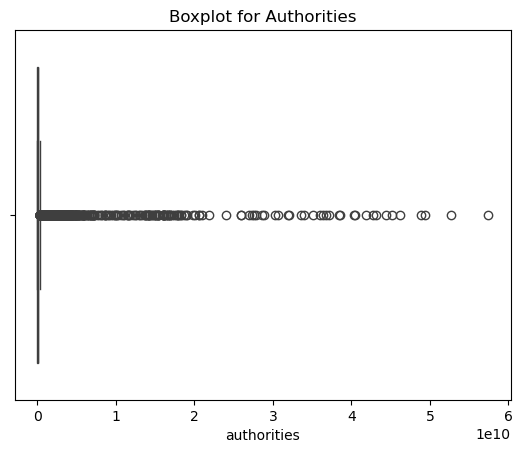

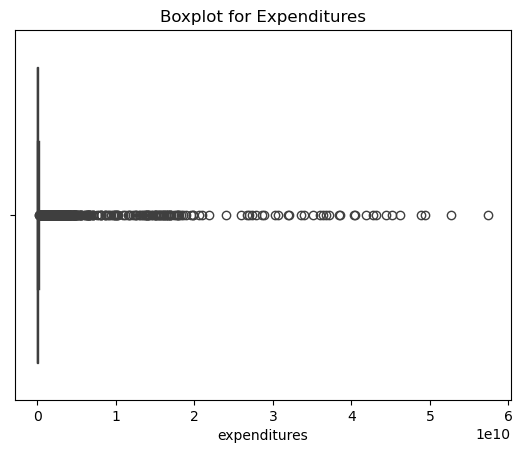

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram and boxplot for authorities and expenditures
sns.histplot(df['authorities'], kde=True)  # For distribution
plt.title('Distribution of Authorities')
plt.show()

sns.histplot(df['expenditures'], kde=True)  # For distribution
plt.title('Distribution of Expenditures')
plt.show()

sns.boxplot(x=df['authorities'])
plt.title('Boxplot for Authorities')
plt.show()

sns.boxplot(x=df['expenditures'])
plt.title('Boxplot for Expenditures')
plt.show()


In [10]:
#Check for Imbalanced Data
df.groupby('org_name')['authorities'].sum().sort_values(ascending=False)

org_name
Department of Finance                                            1343766587237.51001
Department of Employment and Social Development                   947848882375.95996
Department of National Defence                                    310359497811.37000
Department of Indigenous Services                                 162414742852.23001
Department of Crown-Indigenous Relations and Northern Affairs     128711322123.60001
                                                                         ...        
Registry of the Public Servants Disclosure Protection Tribunal         6677532.00000
Transportation Appeal Tribunal of Canada                               5919826.00000
Canadian Artists and Producers Professional Relations Tribunal         4412965.00000
Public Appointments Commission Secretariat                             2000107.00000
Freshwater Fish Marketing Corporation                                        1.00000
Name: authorities, Length: 152, dtype: float64

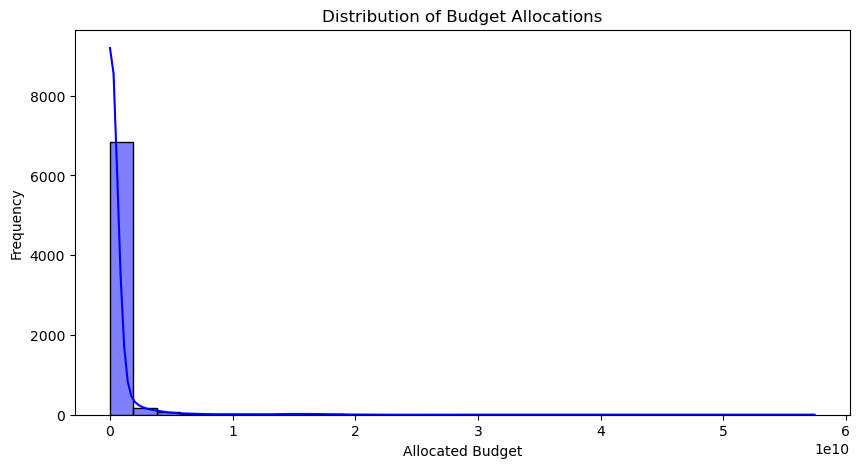

In [11]:
# Distribution of budget allocations
plt.figure(figsize=(10, 5))
sns.histplot(df["authorities"], bins=30, kde=True, color="blue")
plt.title("Distribution of Budget Allocations")
plt.xlabel("Allocated Budget")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Skewness check
print("\n✅ Checking data skewness...")
print(df.skew(numeric_only=True))


✅ Checking data skewness...
authorities    10.09325
expenditures   10.46377
dtype: float64


## 9. Building Models

 Linear Regression model to predict expenditures (the target variable) based on a set of features (such as org_id, org_name, voted_or_statutory, description, and authorities).

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe

# Step 1: Extract fiscal year from 'fy_ef' column
df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))

# Step 2: Encode categorical columns
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['org_name', 'voted_or_statutory', 'description']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Ensure they're treated as strings

# Step 3: Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Step 4: Handle missing values for numeric columns using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Step 5: Define features (X) and target (y)
X = df.drop(columns=['expenditures', 'fy_ef'])  # Features, exclude target and fiscal year column
y = df['expenditures']  # Target

/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/2227837629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/2227837629.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col].astype(str))  # Ensure they're treated as strings
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/2227837629.py:20

In [15]:
df.head(5)

,fy_ef,org_id,org_name,voted_or_statutory,description,authorities,expenditures,fy_year
0,FY 2011-12,1.00000,47.00000,0.00000,102.00000,756690489.00000,704941276.00000,2011.00000
1,FY 2011-12,1.00000,47.00000,1.00000,78.00000,459143202.00000,359941850.00000,2011.00000
2,FY 2011-12,1.00000,47.00000,29.00000,26.00000,34150756.00000,28848626.00000,2011.00000
3,FY 2011-12,1.00000,47.00000,46.00000,19.00000,4893823.00000,4893823.00000,2011.00000
8,FY 2011-12,1.00000,47.00000,46.00000,37.00000,571643883.00000,571643882.90000,2011.00000


In [16]:
print(X.head(5))
y.head(5)

   org_id  org_name  voted_or_statutory  description     authorities  \
0 1.00000  47.00000             0.00000    102.00000 756690489.00000   
1 1.00000  47.00000             1.00000     78.00000 459143202.00000   
2 1.00000  47.00000            29.00000     26.00000  34150756.00000   
3 1.00000  47.00000            46.00000     19.00000   4893823.00000   
8 1.00000  47.00000            46.00000     37.00000 571643883.00000   

     fy_year  
0 2011.00000  
1 2011.00000  
2 2011.00000  
3 2011.00000  
8 2011.00000  


0   704941276.00000
1   359941850.00000
2    28848626.00000
3     4893823.00000
8   571643882.90000
Name: expenditures, dtype: float64

In [17]:

# Step 6: Define features (X) and target (y)
X = df.drop(columns=['expenditures', 'fy_ef'])  # Features, exclude target and fiscal year column
y = df['expenditures']  # Target

# Step 7: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 11: Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3186908444.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3186908444.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')  # Converts invalid parsing to NaN
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_54706/3186908444.py:31: Set

ValueError: could not convert string to float: 'Unknown'

In [ ]:
X

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

In [ ]:
df['fy_ef']

In [ ]:
d = df['fy_ef'][0]
firstd = pd.to_datetime(d, errors='coerce').dt.year

In [ ]:
# Extract the first entry from the 'fy_ef' column
d = df['fy_ef'][0]

# Convert to datetime (if it's not already in datetime format)
firstd = pd.to_datetime(d, errors='coerce')

# If you want to extract the year:
first_year = firstd.year

print(first_year)


In [ ]:
# Example value from 'fy_ef' column
d = 'FY 2011-12'

# Extract the year from the string (assuming the format is always like 'FY yyyy-yy')
first_year = int(d.split()[1].split('-')[0])

print(first_year)


In [ ]:
# If you want to extract the first year from the whole 'fy_ef' column
df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))

# Check the updated DataFrame
print(df[['fy_ef', 'fy_year']].head())
